#**LOAN PREDICTION**

---

**DATASET** =["https://www.kaggle.com/datasets/ninzaami/loan-predication"]

##**INTRODUCTION:**

**The dataset under consideration comprises information related to loan applications, encompassing various demographic and financial attributes of the applicants. The goal is likely to predict or analyze loan approval status based on the provided features.**

---

###**DATASET OVERVIEW:**
*This robust dataset encompasses 614 rows and 13 columns,

1.Loan_ID: Unique identifiers for loan applications, establishing a distinct identity for each entry.

1.Gender:  (categorical: Male/Female).

2.Married: (categorical: Yes/No).

3.Dependents: (numerical: Number of dependents).

4.Education:  (categorical: Graduate/Not Graduate).

5.Self_Employed:  (categorical: Yes/No).

6.ApplicantIncome:  (numerical: Applicant's income).

7.CoapplicantIncome: (numerical: Co-applicant's income).

8.LoanAmount:  (numerical: Applied loan amount).

9.Loan_Amount_Term:  (numerical: Term of the loan in months).

10.Credit_History: (numerical: Credit history).

11.Property_Area: (categorical: Urban/Semiurban/Rural).

12.Loan_Status: (categorical: Approved/Not Approved).

###**IMPORTING LIBRARIES**

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [94]:
data=pd.read_csv('/content/loan_prediction.csv')
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


###**EXPLORE AND PREPROCESS DATA**

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 67.2+ KB


In [96]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [97]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**theres missing values to be handles in both numeric and categorical columns**

###**HANDLING MISSING VALUES**

|**FOR CATEGORICAL COLUMNS:**|

 HANDLING BY USING MODE(MOST FREQUENT VALUE)**|

|**FOR NUMERICAL COLUMNS:**|

1.**LOAN_AMOUNT**=Since LoanAmount is a numerical column,can impute missing values with the median, which is a robust measure of central tendency, less sensitive to outliers.


2.**LOAN_AMOUNT_TERM**:=For Loan_Amount_Term, can use the mode (most frequent value) since it represents a discrete term.

3.**CREDIT_HISTORY**=Credit_History is binary (0 or 1),can impute missing values with the mode, which represents the most common credit history.


In [98]:
#CATEGORICAL#
data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)

#NUMERICAL#
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)


In [99]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

##**EDA**

In [101]:
pip install ing_theme_matplotlib

In [102]:
from ing_theme_matplotlib import mpl_style

In [103]:
mpl_style(dark=True)

###**LOAN APPROVAL STATUS**

<ipython-input-60-251cbd85d229>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Status', data=data, palette='Set2')


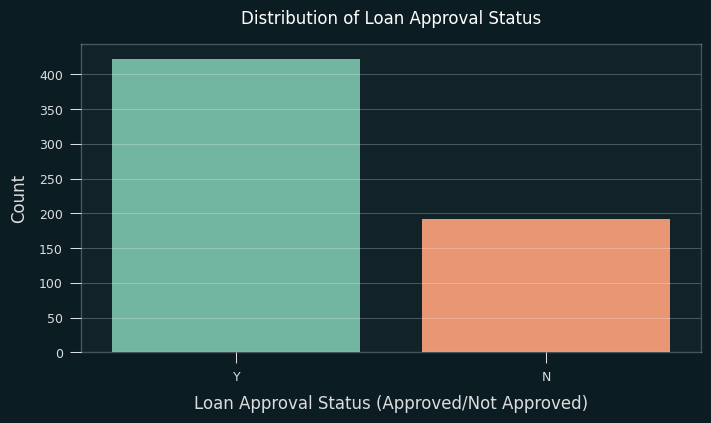

In [60]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Loan_Status', data=data, palette='Set2')
plt.title('Distribution of Loan Approval Status')
plt.xlabel('Loan Approval Status (Approved/Not Approved)')
plt.ylabel('Count')
plt.show()




**The number of approved loans is higher compared to rejected loan**

###**DISTRIBUTION GENDER**

<ipython-input-61-0a2095026b7d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender', data=data,  palette='Set1')


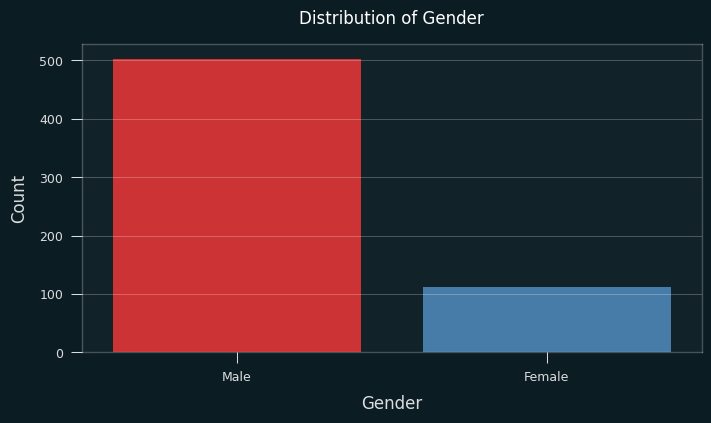

In [61]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Gender', data=data,  palette='Set1')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


**the number of male applicants is higher compared to female applicants**

###**MARTIAL STATUS**

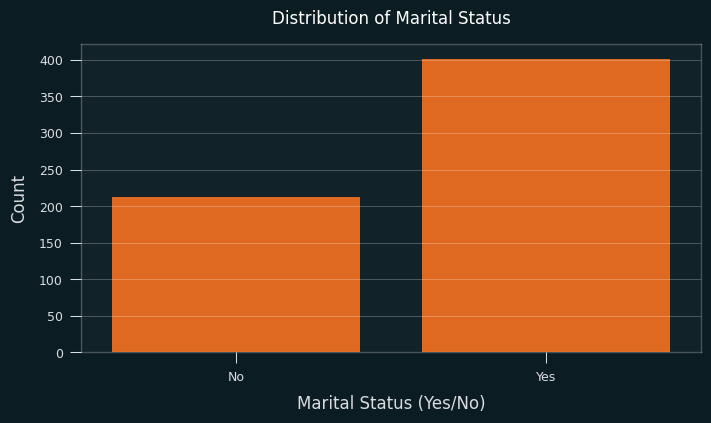

In [62]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Married', data=data,)
plt.title('Distribution of Marital Status')
plt.xlabel('Marital Status (Yes/No)')
plt.ylabel('Count')
plt.show()


**The number of applicants that has been married is higher compared to applicants that hasn't married**

###**SELF EMPLOYMENT**

<ipython-input-63-16b8a1ec583b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Self_Employed', data=data, palette='Dark2')


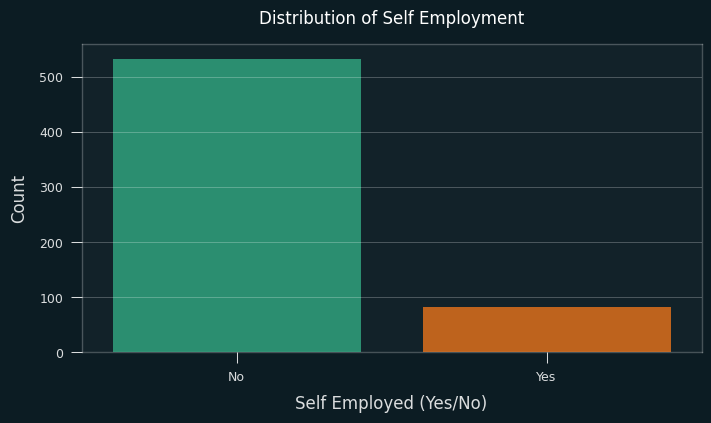

In [63]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Self_Employed', data=data, palette='Dark2')
plt.title('Distribution of Self Employment')
plt.xlabel('Self Employed (Yes/No)')
plt.ylabel('Count')
plt.show()


**The number of applicants that are not self employed is higher compared to applicants that are self employed**

###**EDUCATION**

<ipython-input-64-c4089904f8e8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data, palette='viridis')


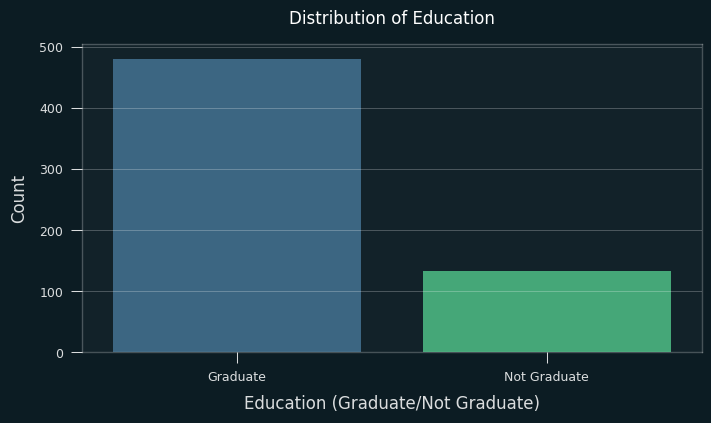

In [64]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Education', data=data, palette='viridis')
plt.title('Distribution of Education')
plt.xlabel('Education (Graduate/Not Graduate)')
plt.ylabel('Count')
plt.show()


**The number of applicants that has been graduated is higher compared to applicants that hasn't graduated.**

###**DISTRIBUTION OF APPLICANT INCOME**

Text(0, 0.5, 'Frequency')

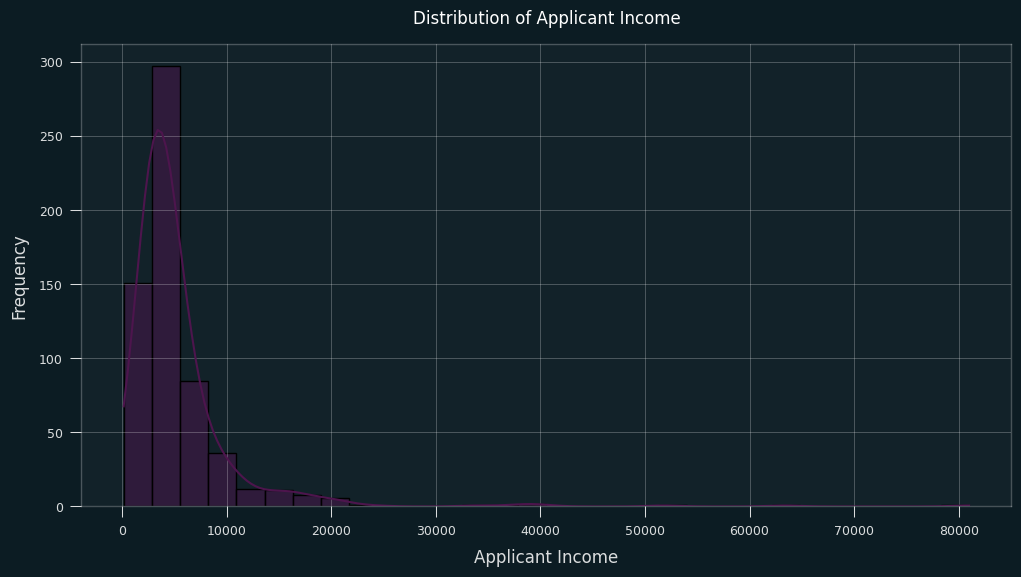

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Use a dark color
dark_color = sns.dark_palette("purple")[2]  # Choose a shade of dark purple

sns.histplot(data['ApplicantIncome'], bins=30, kde=True, color=dark_color)
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')




**positively skewed and have outliers**

###**Distribution of Coapplicant Income**

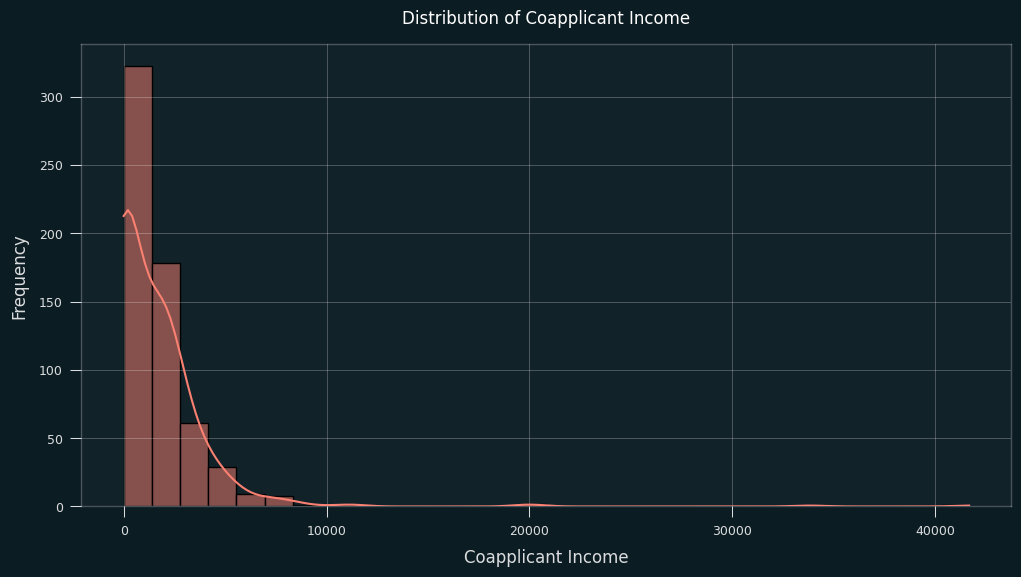

In [65]:
plt.figure(figsize=(12, 6))
sns.histplot(data['CoapplicantIncome'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Coapplicant Income')
plt.xlabel('Coapplicant Income')
plt.ylabel('Frequency')
plt.show()


**positively skewd ,have outliers**

###**DISTRIBUTION OF LOAN AMOUNT**

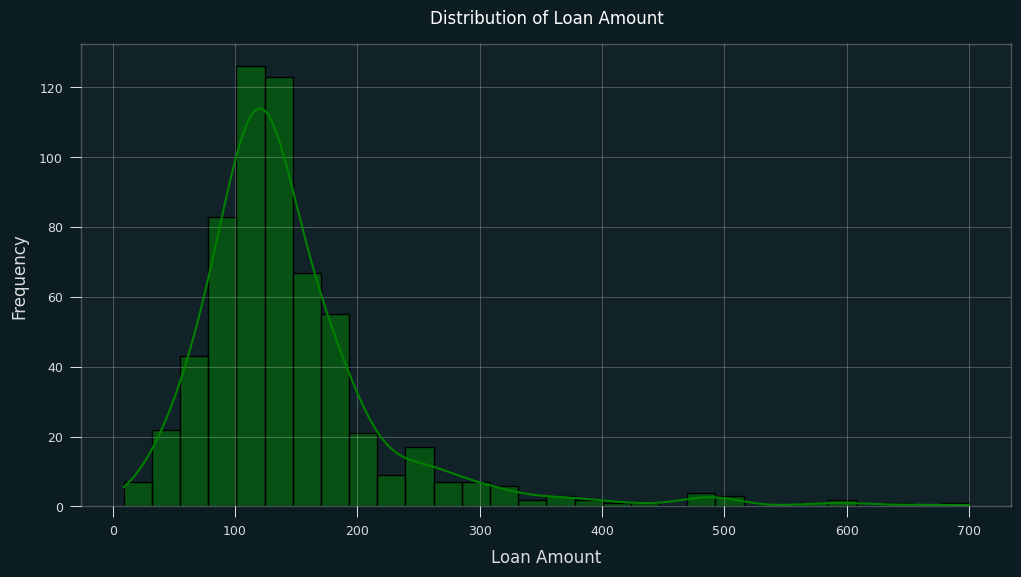

In [66]:
plt.figure(figsize=(12, 6))
sns.histplot(data['LoanAmount'], bins=30, kde=True, color='green')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')
plt.show()


**positively amount,have outliers**

###**DISTRIBUTION OF LONG TERM**

<ipython-input-67-4578034a2439>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Loan_Amount_Term', data=data, palette='viridis')


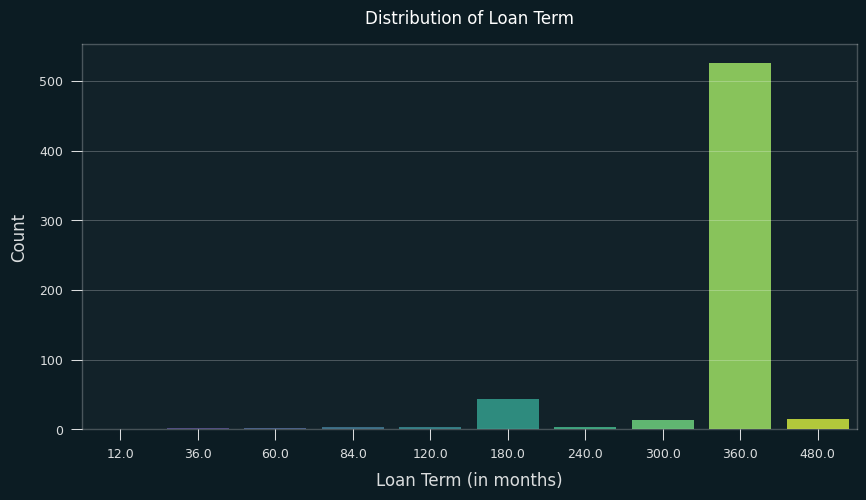

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(x='Loan_Amount_Term', data=data, palette='viridis')
plt.title('Distribution of Loan Term')
plt.xlabel('Loan Term (in months)')
plt.ylabel('Count')
plt.show()


**the 360 days loan duration is the most popular compared to others.**

**can consider negatively skewed**

###**CREDIT HISTORY**

<ipython-input-68-636b9cf6d155>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Credit_History', data=data, palette='pastel')


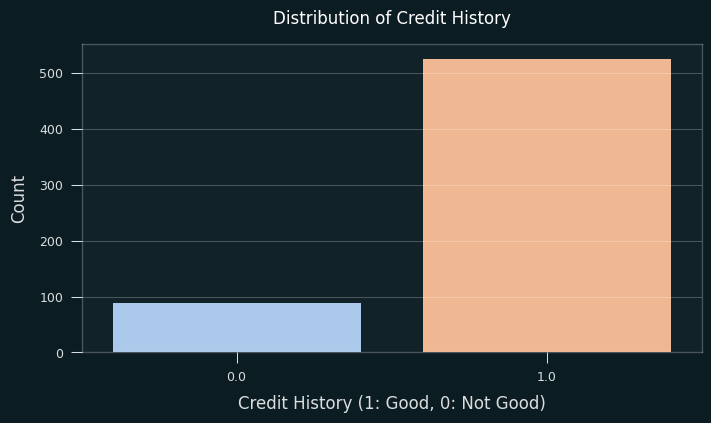

In [68]:
plt.figure(figsize=(8, 4))
sns.countplot(x='Credit_History', data=data, palette='pastel')
plt.title('Distribution of Credit History')
plt.xlabel('Credit History (1: Good, 0: Not Good)')
plt.ylabel('Count')
plt.show()


**The number of applicants that have good credit history is higher compared to applicants that have bad credit history.**

##**DATA PREPROCESING**


**dropping unnecassery variable**

In [109]:
data = data.drop(['Loan_ID'], axis = 1)

In [113]:
print(data.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


###**ENCODING**

In [115]:
data = pd.get_dummies(data)

columns_to_drop = ['Gender_Female', 'Married_No', 'Education_Not Graduate',
                   'Self_Employed_No', 'Loan_Status_N']
data = data.drop(columns_to_drop, axis=1)

column_mapping = {
    'Gender_Male': 'Gender',
    'Married_Yes': 'Married',
    'Education_Graduate': 'Education',
    'Self_Employed_Yes': 'Self_Employed',
    'Loan_Status_Y': 'Loan_Status'
}
data.rename(columns=column_mapping, inplace=True)


###**HANDLING OUTLIERS BY IQR METHOD**

In [117]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

data = data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

###**SKEWED DISTRIBUTION TREATMENT**

**it already shown that distribution for ApplicantIncome, CoapplicantIncome, and LoanAmount is positively skewed.
I will use square root transformation to normalized the distribution.**

In [118]:
data.ApplicantIncome = np.sqrt(data.ApplicantIncome)
data.CoapplicantIncome = np.sqrt(data.CoapplicantIncome)
data.LoanAmount = np.sqrt(data.LoanAmount)

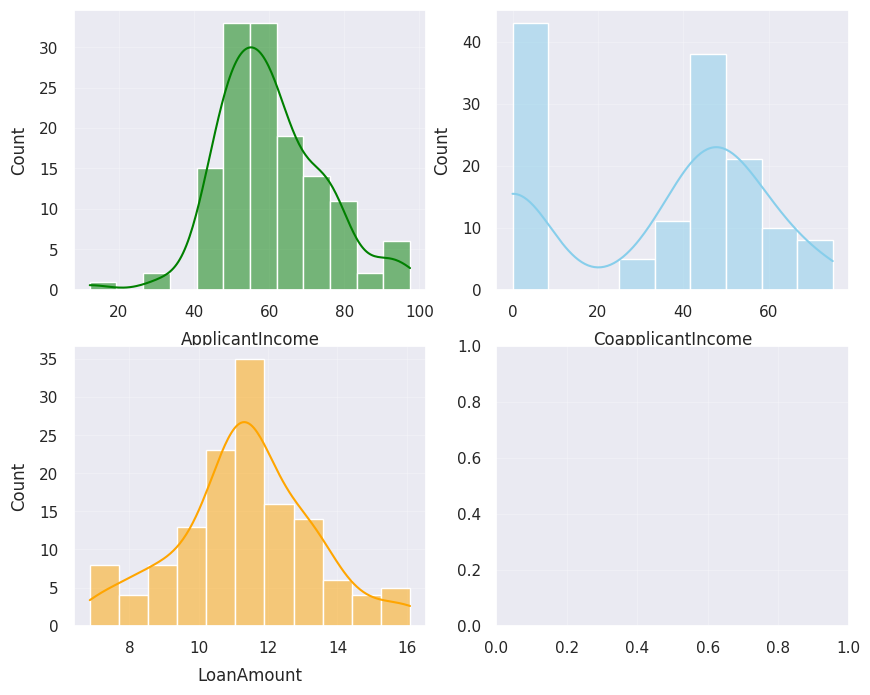

In [140]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=data, x="ApplicantIncome", kde=True, ax=axs[0, 0], color='green')
sns.histplot(data=data, x="CoapplicantIncome", kde=True, ax=axs[0, 1], color='skyblue')
sns.histplot(data=data, x="LoanAmount", kde=True, ax=axs[1, 0], color='orange');

**the distribution after using log transformation are much better compared to original distribution**

###**FEATURE SEPARATION**

In [120]:
X = data.drop(["Loan_Status"], axis=1)
y = data["Loan_Status"]

**it can be seen that the number between approved and rejected loan is imbalanced. In this section, oversampling technique will be used to avoid overfitting,**

###**SMOTE TECHNIQUE**

In [122]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

###**DATA NORMALIZATION**
 data normalization will be performed to normalize the range of independent variables or features of data.

In [126]:
from sklearn.preprocessing import MinMaxScaler
X = MinMaxScaler().fit_transform(X)

###**SPLITTING DATASET**

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

###**MODEL AND EVALUATION**

In [146]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**LOGISTIC REGRESSION**

In [145]:

LRclassifier = LogisticRegression(solver='saga', max_iter=500, random_state=1)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

LRAcc = accuracy_score(y_test, y_pred)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.63      0.69        19
           1       0.76      0.85      0.80        26

    accuracy                           0.76        45
   macro avg       0.75      0.74      0.74        45
weighted avg       0.75      0.76      0.75        45

Confusion Matrix:
 [[12  7]
 [ 4 22]]


**DECISION TREE**

In [147]:
dt_classifier = DecisionTreeClassifier(random_state=1)
dt_classifier.fit(X_train, y_train)
dt_pred = dt_classifier.predict(X_test)

print("\nDecision Tree:")
print("Classification Report:\n", classification_report(y_test, dt_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, dt_pred))
dt_acc = accuracy_score(y_test, dt_pred)
print('Decision Tree accuracy: {:.2f}%'.format(dt_acc * 100))


Decision Tree:
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.74      0.72        19
           1       0.80      0.77      0.78        26

    accuracy                           0.76        45
   macro avg       0.75      0.75      0.75        45
weighted avg       0.76      0.76      0.76        45

Confusion Matrix:
 [[14  5]
 [ 6 20]]
Decision Tree accuracy: 75.56%


**RANDOMFOREST**

In [148]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=1)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)

print("\nRandom Forest:")
print("Classification Report:\n", classification_report(y_test, rf_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
rf_acc = accuracy_score(y_test, rf_pred)
print('Random Forest accuracy: {:.2f}%'.format(rf_acc * 100))


Random Forest:
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.89      0.85        19
           1       0.92      0.85      0.88        26

    accuracy                           0.87        45
   macro avg       0.86      0.87      0.86        45
weighted avg       0.87      0.87      0.87        45

Confusion Matrix:
 [[17  2]
 [ 4 22]]
Random Forest accuracy: 86.67%


**MODEL COMPARISON**

In [149]:
models = {
       'Decision Tree': DecisionTreeClassifier(random_state=1),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=1),
    'Logistic Regression': LogisticRegression(random_state=1)

}

results_data = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    precision = report['weighted avg']['precision']
    recall = report['weighted avg']['recall']
    f1_score = report['weighted avg']['f1-score']

    results_data = results_data.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1_score
    }, ignore_index=True)

print(results_data)


                 Model  Accuracy  Precision    Recall  F1-Score
0        Decision Tree  0.755556   0.757778  0.755556  0.756293
1        Random Forest  0.866667   0.871429  0.866667  0.867333
2  Logistic Regression  0.755556   0.754981  0.755556  0.751746


<ipython-input-149-a99f6f60a928>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-149-a99f6f60a928>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-149-a99f6f60a928>:21: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.





---



##**Model Performance Summary:**
**1.Decision Tree:**

**Accuracy:** 75.56%

**Precision:** 75.78%

**Recall:** 75.56%

**F1-Score:** 75.63%

**Comments:** The Decision Tree demonstrates good overall performance, with balanced precision and recall.

**2.Random Forest:**

**Accuracy:** 86.67%

**Precision:** 87.14%

**Recall:** 86.67%

**F1-Score:** 86.73%

**Comments:** Random Forest outperforms the Decision Tree, achieving higher accuracy and slightly improved precision and recall.

**3.Logistic Regression:**

**Accuracy:** 75.56%

**Precision:** 75.50%

**Recall:** 75.56%

**F1-Score:** 75.17%

**Comments:** Logistic Regression performs comparably to the Decision Tree, with a balanced trade-off between precision and recall.

**Recommendations:**

Random Forest appears to be the top performer, achieving the highest accuracy and overall good precision and recall. Consider deploying the Random Forest model for its strong predictive capabilities.

Decision Tree and Logistic Regression: While these models show decent performance, they might be chosen for deployment if interpretability is a priority or computational resources are limited.